# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: Country_Region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [93]:
import pandas as pd

data_set = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-16-2021.csv')

#### Display the top 5 rows in the data

In [94]:
data_set.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-09-17 04:21:46,33.93911,67.709953,154361,7183,NaN,NaN,Afghanistan,396.526017,4.653377
1,NaN,NaN,NaN,Albania,2021-09-17 04:21:46,41.15330,20.168300,160365,2563,NaN,NaN,Albania,5572.485927,1.598229
2,NaN,NaN,NaN,Algeria,2021-09-17 04:21:46,28.03390,1.659600,200989,5651,NaN,NaN,Algeria,458.344856,2.811597
3,NaN,NaN,NaN,Andorra,2021-09-17 04:21:46,42.50630,1.521800,15113,130,NaN,NaN,Andorra,19559.955996,0.860187
4,NaN,NaN,NaN,Angola,2021-09-17 04:21:46,-11.20270,17.873900,51827,1371,NaN,NaN,Angola,157.690554,2.645339


#### Show the information of the dataset

In [95]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3267 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3814 non-null   object 
 3   Country_Region       3988 non-null   object 
 4   Last_Update          3988 non-null   object 
 5   Lat                  3899 non-null   float64
 6   Long_                3899 non-null   float64
 7   Confirmed            3988 non-null   int64  
 8   Deaths               3988 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         3988 non-null   object 
 12  Incident_Rate        3898 non-null   float64
 13  Case_Fatality_Ratio  3949 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 436.3+ KB


#### Show the sum of missing values of features in the dataset

In [96]:
data_set.isna().sum()

FIPS                    721
Admin2                  716
Province_State          174
Country_Region            0
Last_Update               0
Lat                      89
Long_                    89
Confirmed                 0
Deaths                    0
Recovered              3988
Active                 3988
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      39
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [97]:
data_set.groupby('Country_Region').agg({'Confirmed': 'sum'})

,Confirmed
Country_Region,
Afghanistan,154361
Albania,160365
Algeria,200989
Andorra,15113
Angola,51827
...,...
Vietnam,656129
West Bank and Gaza,379635
Yemen,8557


#### Show the number of Deaths by Country

In [98]:
data_set.groupby('Country_Region').agg({'Deaths': 'sum'})

,Deaths
Country_Region,
Afghanistan,7183
Albania,2563
Algeria,5651
Andorra,130
Angola,1371
...,...
Vietnam,16425
West Bank and Gaza,3871
Yemen,1619


#### Show the number of Recovered cases by Country

In [99]:
data_set.groupby('Country_Region').agg({'Recovered': 'sum'})

,Recovered
Country_Region,
Afghanistan,0.0
Albania,0.0
Algeria,0.0
Andorra,0.0
Angola,0.0
...,...
Vietnam,0.0
West Bank and Gaza,0.0
Yemen,0.0


#### Show the number of Active Cases by Country

In [100]:
data = data_set.groupby('Country_Region').sum()
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data[['Active']]

,Active
Country_Region,
Afghanistan,147178.0
Albania,157802.0
Algeria,195338.0
Andorra,14983.0
Angola,50456.0
...,...
Vietnam,639704.0
West Bank and Gaza,375764.0
Yemen,6938.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [101]:
data[['Confirmed', 'Deaths', 'Recovered', 'Active']]

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,154361,7183,0.0,147178.0
Albania,160365,2563,0.0,157802.0
Algeria,200989,5651,0.0,195338.0
Andorra,15113,130,0.0,14983.0
Angola,51827,1371,0.0,50456.0
...,...,...,...,...
Vietnam,656129,16425,0.0,639704.0
West Bank and Gaza,379635,3871,0.0,375764.0
Yemen,8557,1619,0.0,6938.0


### Question 3

### Show the countries with no recovered cases

In [102]:
recovered_data = data_set.groupby('Country_Region')['Recovered'].sum().reset_index()
recovered_data[recovered_data['Recovered'] == 0]

,Country_Region,Recovered
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,0.0
3,Andorra,0.0
4,Angola,0.0
...,...,...
190,Vietnam,0.0
191,West Bank and Gaza,0.0
192,Yemen,0.0
193,Zambia,0.0


#### Show the countries with no confirmed cases

In [103]:
confirmed_data = data_set.groupby('Country_Region')['Confirmed'].sum().reset_index()
confirmed_data[confirmed_data['Confirmed'] == 0]

,Country_Region,Confirmed


#### Show the countries with no deaths

In [104]:
deaths_data = data_set.groupby('Country_Region')['Deaths'].sum().reset_index()
deaths_data[deaths_data['Deaths'] == 0]

,Country_Region,Deaths
75,Holy See,0
91,Kiribati,0
112,Marshall Islands,0
116,Micronesia,0
134,Palau,0
149,Samoa,0
160,Solomon Islands,0
167,Summer Olympics 2020,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [105]:
confirmed_data.sort_values(by='Confirmed', ascending=False)[:10]

,Country_Region,Confirmed
181,US,41785903
79,India,33381728
23,Brazil,21069017
185,United Kingdom,7373451
144,Russia,7110656
62,France,7022203
180,Turkey,6766978
81,Iran,5378408
6,Argentina,5234851
37,Colombia,4936052


#### Show the Top 10 Countries with Active cases

In [106]:
data['Active'].reset_index().sort_values(by='Active', ascending=False)[:10]

,Country_Region,Active
181,US,41115903.0
79,India,32937480.0
23,Brazil,20479771.0
185,United Kingdom,7238317.0
144,Russia,6918316.0
62,France,6905692.0
180,Turkey,6706075.0
81,Iran,5262336.0
6,Argentina,5120750.0
164,Spain,4840585.0


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [107]:
import matplotlib.pyplot as plt

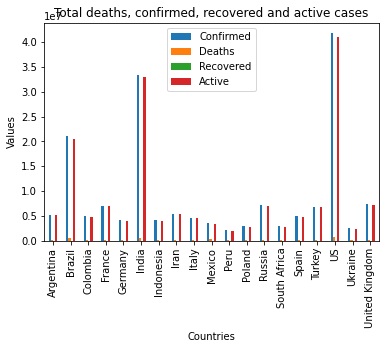

In [108]:
for_plotting = data[['Confirmed', 'Deaths', 'Recovered', 'Active']]
for_plotting = for_plotting[for_plotting['Deaths'] > 50000]
for_plotting.plot(kind='bar')

plt.xlabel('Countries')
plt.ylabel('Values')
plt.title('Total deaths, confirmed, recovered and active cases')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [109]:
import plotly.express as px

In [110]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [111]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [112]:
grouped_covid_data_us = covid_data[covid_data['Country_Region'] == 'US']
grouped_covid_data_us_state = grouped_covid_data_us.groupby('Province_State').sum().reset_index()
grouped_covid_data = grouped_covid_data_us_state[grouped_covid_data_us_state['Deaths'] > 0]
grouped_covid_data_plot = grouped_covid_data[['Province_State', 'Deaths']]
px.bar(grouped_covid_data_plot, x='Province_State', y='Deaths', title='Province/State wise Deaths in USA')

### Question 7

### Plot Province/State Wise Active Cases in USA

In [113]:
active_us = grouped_covid_data_us_state[['Province_State', 'Active']]
px.bar(active_us, x='Province_State', y='Active', title='Province/State Wise Active Cases in USA')

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [114]:
confirmed_us = grouped_covid_data_us_state[['Province_State', 'Confirmed']]
px.bar(confirmed_us, x='Province_State', y='Confirmed', title='Province/State Wise Confirmed cases in USA')

### Question 9

### Plot Worldwide Confirmed Cases over time

In [115]:
import plotly.express as px
import plotly.io as pio

In [116]:
confirmed_time = covid_data.groupby('Last_Update').sum().reset_index()[['Last_Update', 'Confirmed']]
px.line(confirmed_time, x='Last_Update', y='Confirmed')